# Table of Content

* [Transfer of Dataset](#1)
* [Exploratory Data Analysis](#2)
* [Quality Inspection Based On 3 Categories](#3)
>* [Decision Trees](#4)
>* [Random Forest](#5)
>* [Neural Network](#6)
>* [Logistic Regression](#7)
>* [K-NearestNeighbors](#8)
>* [Gradient Boosting Machines](#9)
>* [XGBoost](#10)
>* [Light Boost](#11)
>* [Cat Boost](#12)
* [Quality Inspection Based On 2 Categories](#13)
>* [Decision Trees](#14)
>* [Random Forest](#15)
>* [Neural Network](#16)
>* [Logistic Regression](#17)
>* [K-NearestNeighbors](#18)
>* [Gradient Boosting Machines](#19)
>* [XGBoost](#20)
>* [Light Boost](#21)
>* [Cat Boost](#22)
* 

In [60]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from warnings import filterwarnings
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import pickle as pkl
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [61]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]
        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]
        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
        
    return roc_auc_dict

<a id="1" ><a/>

# Transfer of Dataset

In [62]:
data = pd.read_csv("WineQuality.csv")
df = data.copy()

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()



,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,3103,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white
1,1419,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white
2,4761,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white
3,4690,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white
4,4032,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white


<a id="2" ><a/>

# Exploratory Data Analysis

In [82]:
df["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

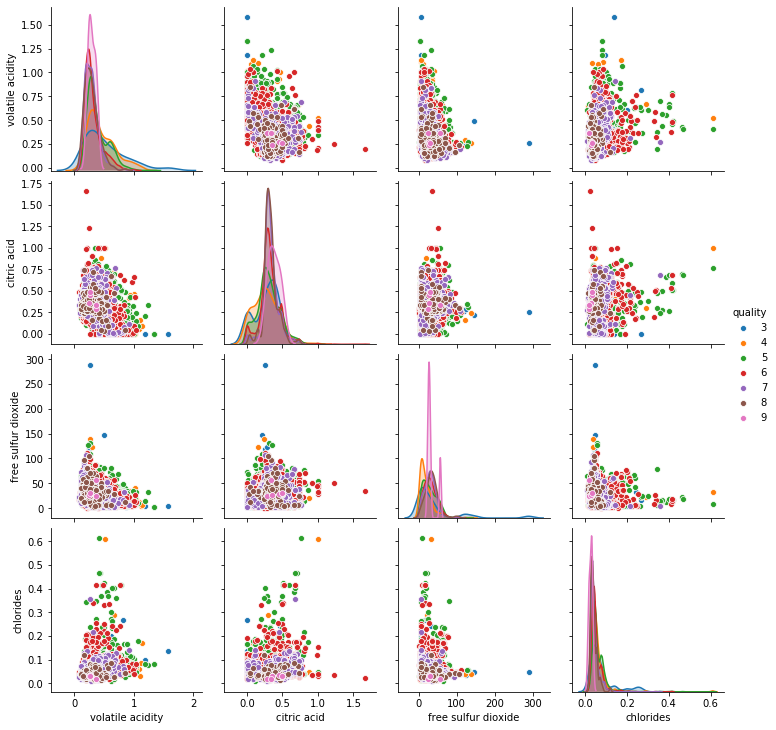

In [79]:
sns.pairplot(df[["volatile acidity", "citric acid", "quality", "free sulfur dioxide", "chlorides"]], hue="quality")


# Distribution of Quality

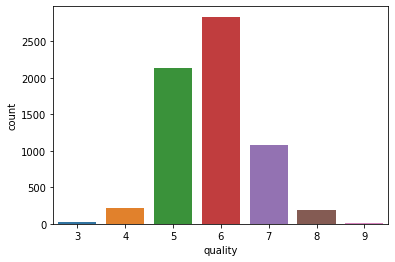

In [65]:
sns.countplot(data=df, x="quality")

In [63]:
df['quality_label'] = df.quality.apply(lambda q: 'low' if q <= 4 else 'medium' if q <= 6 else 'high')
df['quality_class'] = df.quality_label.apply(lambda q: 1 if q == 'high' else 3 if q == 'low' else 2)

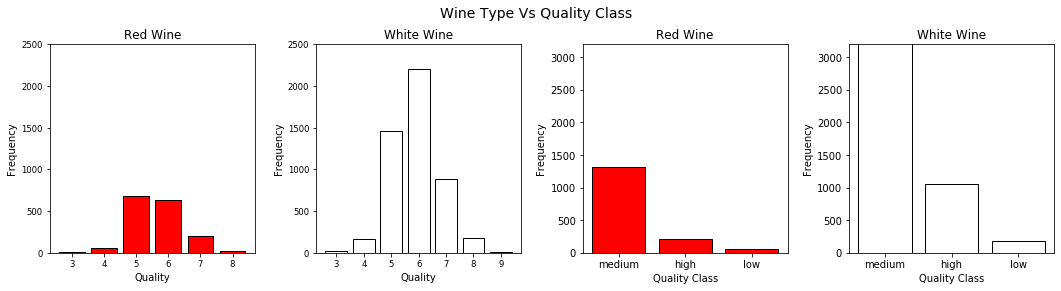

In [64]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("Wine Type Vs Quality Class", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,4, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = df.quality[df.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = df.quality[df.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1,4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = df.quality_label[df.type == 'red'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1,4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = df.quality_label[df.type == 'white'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', edgecolor='black', linewidth=1, tick_label =ww_q[0])

In [68]:
df.quality.describe()


count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

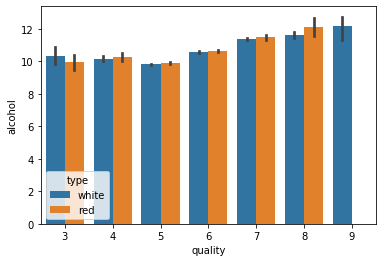

In [74]:
sns.barplot(data=df, x="quality", y="alcohol", hue="type")


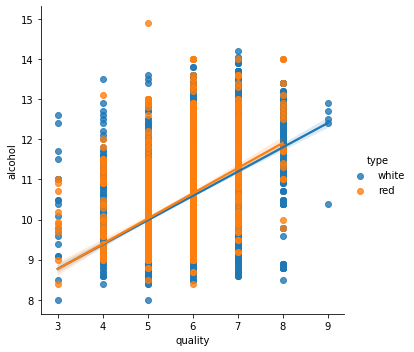

In [76]:
sns.lmplot(data=df, x="quality", y="alcohol", hue="type")


# Alcohol to Quality relation for Wines Quality equal or greater than 7


AttributeError: module 'seaborn' has no attribute 'plt'

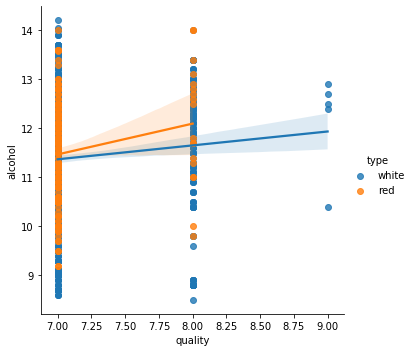

In [77]:
high_quality = df[df.quality >= 7]
sns.lmplot(data=high_quality, x="quality", y="alcohol", hue="type")
sns.plt.title("Quality >= 7")

# Heatmap Alcogol to Quality

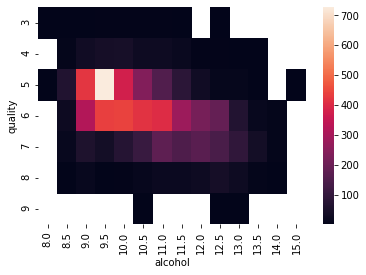

In [78]:
ht = df[["quality", "alcohol"]].copy()
ht["alcohol"] = ht.alcohol.apply(func=lambda x: round(x * 2) / 2)
ht = ht.groupby(["quality", "alcohol"])["alcohol"].count().reset_index(name='counts')
sns.heatmap(ht.pivot("quality", "alcohol", "counts"))

In [12]:
df['val_col'] = data.type.apply(lambda q: 1 if q=='red' else 2)
df.drop(['Unnamed: 0'], axis= 1, inplace = True)
df.drop(['type'], axis= 1, inplace = True)
df.drop(['quality_label'], axis=1, inplace = True)

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class,val_col
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,1,2
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,1,2
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,2,2
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,2,2
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,2,2


In [14]:
y = df.quality
X = df.drop('quality', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)


In [16]:
X_train_scaled = preprocessing.scale(X_train)


[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'fixed acidity'),
 Text(2.5, 0, 'volatile acidity'),
 Text(3.5, 0, 'citric acid'),
 Text(4.5, 0, 'residual sugar'),
 Text(5.5, 0, 'chlorides'),
 Text(6.5, 0, 'free sulfur dioxide'),
 Text(7.5, 0, 'total sulfur dioxide'),
 Text(8.5, 0, 'density'),
 Text(9.5, 0, 'pH'),
 Text(10.5, 0, 'sulphates'),
 Text(11.5, 0, 'alcohol'),
 Text(12.5, 0, 'quality'),
 Text(13.5, 0, 'type')]

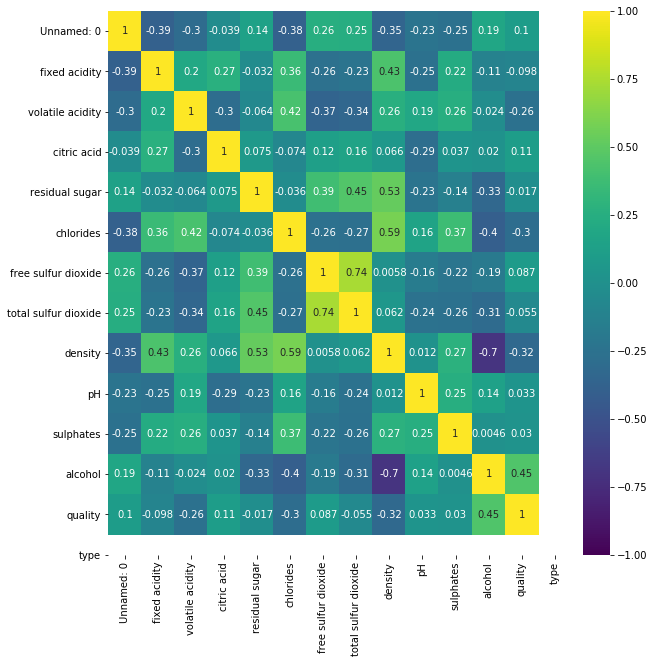

In [17]:
plt.figure(figsize=(10,10))
corr_mat=sns.heatmap(data.corr(method='spearman'),annot=True,cbar=True,
            cmap='viridis', vmax=1,vmin=-1,
            xticklabels=data.columns,yticklabels=data.columns)
corr_mat.set_xticklabels(corr_mat.get_xticklabels(),rotation=90)

<a id="3" ><a/>

# Quality Inspection Based On 3 Categories

In [18]:
df_3_cat = data.copy()

In [19]:
df_3_cat['quality_label'] = df_3_cat.quality.apply(lambda q: 'low' if q <= 4 else 'medium' if q <= 6 else 'high')
df_3_cat['quality_class'] = df_3_cat.quality_label.apply(lambda q: 1 if q == 'high' else 3 if q == 'low' else 2)
# quality class represents wines class, if its high quality label, it is 1st class wine
df_3_cat['val_col'] = df_3_cat.type.apply(lambda q: 1 if q=='red' else 0)
# The value 1 represents that the wine is red, 0 means that it is white.
df_3_cat.shape

(6497, 17)

In [20]:
df_3_cat = df_3_cat.drop([ "quality_label","quality", "Unnamed: 0","type"], axis = 1)

In [21]:
df_3_cat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class,val_col
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,2,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,2,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,2,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2,1


### Setting the Train and Test sets.

In [22]:
y = df_3_cat['quality_class']
X = df_3_cat.drop(['quality_class'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<a id="4" ><a/>

# 1. Decision Trees for 3 Categories

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

In [23]:
cl_tree3 = Pipeline([('cl3', DecisionTreeClassifier(random_state=42))])  

# list of  parameters  to tune
criterion3 = ['gini', 'entropy']
splitter3 = ['best','random']
max_depth3 = list(range(1,20))
min_samples_leaf3 = [1,2, 3, 5,7,9]
class_weight3 = ['balanced', None] 
max_features3=[12,11,10,9]

parameters_grid_tree3 =[{ 'cl3__class_weight': class_weight3
      ,'cl3__criterion': criterion3
      ,'cl3__splitter': splitter3
      ,'cl3__max_depth': max_depth3
      ,'cl3__min_samples_leaf': min_samples_leaf3
      ,'cl3__max_features':max_features3}]

gs_tree3 = GridSearchCV(estimator=cl_tree3, param_grid=parameters_grid_tree3, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

Dec_trees3 = Pipeline([('scl', StandardScaler()),('gs', gs_tree3)]) 

In [24]:
Dec_trees3.fit(X_train,y_train)

Fitting 5 folds for each of 3648 candidates, totalling 18240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 10520 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 17720 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 18240 out of 18240 | elapsed:   43.5s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score=nan,
                              estimator=Pipeline(memory=None,
                                                 steps=[('cl3',
                                                         DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impu

In [25]:
gs_tree3.best_params_ 

{'cl3__class_weight': None,
 'cl3__criterion': 'gini',
 'cl3__max_depth': 19,
 'cl3__max_features': 11,
 'cl3__min_samples_leaf': 1,
 'cl3__splitter': 'best'}

In [26]:
Tree3=DecisionTreeClassifier(class_weight= None,
                             criterion= 'gini',
                             max_depth=19, 
                             max_features=11,                          
                             min_samples_leaf= 1, 
                             splitter='best')

In [27]:
Tree3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=19, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
predicted_labels_tree3 = Tree3.predict(X_test).ravel()
true_labels_tree3=np.asarray(y_test)

In [31]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, predicted_labels_tree3.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.61      0.63      0.62       308
     class 2       0.88      0.88      0.88      1259
     class 3       0.33      0.34      0.34        58

    accuracy                           0.81      1625
   macro avg       0.61      0.62      0.61      1625
weighted avg       0.81      0.81      0.81      1625



In [34]:
cm_tree3 = metrics.confusion_matrix(y_true=true_labels_tree3, y_pred=predicted_labels_tree3)
cm_frame_tree3 = pd.DataFrame(data=cm_tree3, columns=target_names,index=target_names)

In [35]:
cm_frame_tree3

,class 1,class 2,class 3
class 1,194,108,6
class 2,120,1104,35
class 3,2,36,20


In [39]:
roc_auc_multiclass_tree3 = roc_auc_score_multiclass(true_labels_tree3, predicted_labels_tree3)

print(roc_auc_multiclass_tree3)

{1: 0.7686176769320278, 2: 0.7417218974205393, 3: 0.6593314701934291}


<a id="5" ><a/>

# 2. Random Forest for 3 Categories

In [40]:
from sklearn.ensemble import RandomForestClassifier

list of  parameters  to tune

In [41]:
cl_RF_3 = Pipeline([('cl_rf3', RandomForestClassifier(random_state=42))])  


criterion_rf3 = ['gini', 'entropy'] 

class_weight_rf3 = ['balanced', None] 

n_estimators_rf3 = list(range(150,200, 10)) 

max_depth_rf3  = [16,20,24,28, None] 

min_samples_split_rf3 = [2, 3, 4] 

min_samples_leaf_rf3 = [1,2]

param_grid_rf3 =[{ 'cl_rf3__class_weight': class_weight_rf3
      ,'cl_rf3__criterion': criterion_rf3
    
      ,'cl_rf3__n_estimators': n_estimators_rf3 
    
      ,'cl_rf3__min_samples_split': min_samples_split_rf3
    
      ,'cl_rf3__max_depth': max_depth_rf3
      ,'cl_rf3__min_samples_leaf': min_samples_leaf_rf3
}]

gs_rf3 = GridSearchCV(estimator=cl_RF_3, param_grid=param_grid_rf3, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
RF3 = Pipeline([('scl', StandardScaler()),
        ('gs', gs_rf3)
 ]) 

In [42]:
RF3.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 11.2min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score=nan,
                              estimator=Pipeline(memory=None,
                                                 steps=[('cl_rf3',
                                                         RandomForestClassifier(bootstrap=True,
                                                                                ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf

In [50]:
gs_rf3.best_params_ 

{'cl_rf3__class_weight': 'balanced',
 'cl_rf3__criterion': 'entropy',
 'cl_rf3__max_depth': 20,
 'cl_rf3__min_samples_leaf': 1,
 'cl_rf3__min_samples_split': 4,
 'cl_rf3__n_estimators': 190}

In [51]:
R_forest3=RandomForestClassifier(class_weight='balanced',
 criterion='entropy',
 max_depth=20,
 min_samples_split=4,                          
 n_estimators=190,
 min_samples_leaf=1
)

In [56]:
R_forest3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
predicted_labels_rf3 = R_forest3.predict(X_test).ravel()

In [58]:
true_labels_rf3=np.asarray(y_test)

In [59]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, predicted_labels_rf3.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.78      0.55      0.65       308
     class 2       0.86      0.96      0.91      1259
     class 3       0.83      0.09      0.16        58

    accuracy                           0.85      1625
   macro avg       0.83      0.53      0.57      1625
weighted avg       0.85      0.85      0.83      1625



In [60]:
cm_rf3 = metrics.confusion_matrix(y_true=true_labels_rf3, y_pred=predicted_labels_rf3)
cm_frame_rf3 = pd.DataFrame(data=cm_rf3, columns=target_names,index=target_names)

In [61]:
cm_frame_rf3

,class 1,class 2,class 3
class 1,170,138,0
class 2,46,1212,1
class 3,1,52,5


In [63]:
roc_auc_multiclass_rf3 = roc_auc_score_multiclass(true_labels_rf3, predicted_labels_rf3)

print(roc_auc_multiclass_rf3)

{1: 0.7581304420712165, 2: 0.721771550844846, 3: 0.5427843672292763}


<a id="6" ><a/>

# 3. NN for 3 Categories

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

* we remake the uploading and preparation and spliting in train and test set, because of using another 
* values for labeling the target vSariable (becuase of the usage of loss='sparse_categorical_crossentropy') 
* but using the same logic. Now we will have 0 for high 1 for medium
* and 2 for low quality.

In [20]:
df_nn = data.copy()
df_nn['quality_label'] = df_nn.quality.apply(lambda q: 'low' if q <= 4 else 'medium' if q <= 6 else 'high')
df_nn['quality_class'] = df_nn.quality_label.apply(lambda q: 0 if q == 'high' else 2 if q == 'low' else 1)
df_nn['val_col'] = df_nn.type.apply(lambda q: 1 if q=='red' else 2)

In [21]:
df_nn.drop(['Unnamed: 0'], axis= 1, inplace = True)
df_nn = df_nn.sample(frac=1, random_state=42).reset_index(drop=True)
df_nn = df_nn.drop(["type", "quality_label","quality"], axis = 1)
y_nn3 = df_nn['quality_class']
X_nn3 = df_nn.drop(['quality_class'], axis = 1)
X_train_nn3, X_test_nn3, y_train_nn3, y_test_nn3 = train_test_split(X_nn3, y_nn3, test_size=0.25, random_state=42)

In [22]:
df_nn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class,val_col
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,0,2
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,0,2
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,1,2
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,1,2
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,1,2


In [23]:
# Define the scaler
scaler = StandardScaler().fit(X_train_nn3)
# Scale the train set
X_train_scaled = scaler.transform(X_train_nn3)
# Scale the test set
X_test_scaled = scaler.transform(X_test_nn3)

In [24]:
import numpy as np
X_train1=np.asarray(X_train_scaled)
y_train1=np.asarray(y_train_nn3)
X_test1=np.asarray(X_test_scaled)
y_test1=np.asarray(y_test_nn3)

In [ ]:
model_NN3 = Sequential()
model_NN3.add(Dense(4000, input_dim=12, activation='tanh'))

* Dense(4000 .. we started to train starting with Dense=600 and then increasing by 100, so
* we tried Dense=[600,600,...1200,1500,..2000] then Dense=[3000,3500,4000] with such last dense models
* we achieved a better performance, we stopped at 4000 since it did not improve significatlly anymore)

* input_dim=12 because of 12 predictors (X variables)



In [ ]:
model_NN3.add(Dense(3, activation='softmax')) #softmax because of multi class target

Dense (3 because of 3 class classification target )
'tanh' were performed better then relu activation function (even if just a bit)


In [ ]:
model_NN3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'],random_state=42)

* sparse_categorical_crossentropy becasue of multi class target
* optimizer_sgd=tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
* it was tried but did not show a better performance with respect to adma optimizer but it was much slower
* metrics=[categorical_accuracy] showed a lower performance

In [27]:
History_adam_NN3=model_NN3.fit(X_train1, y_train1,
          batch_size=100,
          epochs=3700)


Train on 4872 samples
Epoch 1/3700
4872/4872 [==============================] - 1s 201us/sample - loss: 0.6367 - accuracy: 0.7406
Epoch 2/3700
4872/4872 [==============================] - 0s 60us/sample - loss: 0.5406 - accuracy: 0.7808
Epoch 3/3700
4872/4872 [==============================] - 0s 61us/sample - loss: 0.5389 - accuracy: 0.7779
Epoch 4/3700
4872/4872 [==============================] - 0s 56us/sample - loss: 0.5411 - accuracy: 0.7779
Epoch 5/3700
4872/4872 [==============================] - 0s 62us/sample - loss: 0.5365 - accuracy: 0.7826
Epoch 6/3700
4872/4872 [==============================] - 0s 62us/sample - loss: 0.5381 - accuracy: 0.7777
Epoch 7/3700
4872/4872 [==============================] - 0s 62us/sample - loss: 0.5378 - accuracy: 0.7806
Epoch 8/3700
4872/4872 [==============================] - 0s 55us/sample - loss: 0.5352 - accuracy: 0.7816
Epoch 9/3700
4872/4872 [==============================] - 0s 56us/sample - loss: 0.5374 - accuracy: 0.7833
Epoch 10/3700


* batch_size was tunned in base of the value of the hidden Dense layer, smaller bach size when smaller Dense value
* was tried batch_size from a value of 30 to a value of max 300 but the size equal to 100 showed better performance
* the same with epochs number for less dense hidden layer smaller nr of epochs, for more dense hidden
* layer a bigger nr of epochs. 


In [29]:
predicted_nn3 = model_NN3.predict(X_test1)
labels_nn3 = np.argmax(predicted_nn3, axis=-1)

* classes valued now are 0 for High 1 for Medium ad 2 for Low, instead of 1 for High 2 for Medium ad 3 for Low,
* because of 'sparse_categorical_crossentropy' that labelizes starting from 0.

In [30]:
sk_report_nn3 = classification_report(
    digits=3,
    y_true=y_test1, 
    y_pred=labels_nn3)
print(sk_report_nn3)

              precision    recall  f1-score   support

           0      0.637     0.613     0.625       344
           1      0.863     0.876     0.869      1223
           2      0.302     0.276     0.288        58

    accuracy                          0.799      1625
   macro avg      0.601     0.588     0.594      1625
weighted avg      0.795     0.799     0.797      1625



In [31]:
cm_nn3= metrics.confusion_matrix(y_test_nn3, labels_nn3)
conf_matrix_nn3=pd.DataFrame(cm_nn3,columns=['0','1','2'],index=['0','1','2'])

In [32]:
conf_matrix_nn3

,0,1,2
0,211,133,0
1,115,1071,37
2,5,37,16


In [112]:
roc_auc_multiclass_nn3 = roc_auc_score_multiclass(y_test1, labels_nn3 )

print(roc_auc_multiclass_nn3)

{0: 0.7598476390174826, 1: 0.7264149408314112, 2: 0.6261250357590828}


Text(0, 0.5, 'Loss')

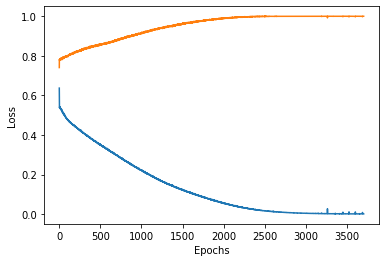

In [33]:
from matplotlib import pyplot as plt

history_dict=History_adam_NN3.history

loss_values = history_dict['loss']

acc_values = history_dict['accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values)
plt.plot(epochs, acc_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

<a id="7" ><a/>

# 4. Logistic Regression for 3 Categories

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
clf_lg3 = Pipeline([('clf_lg3', LogisticRegression(random_state=42))])  

# a list of dictionaries to specify the parameters that we'd want to tune

tol_lg3 = [1e-07,1e-06, 1e-05, 1e-04]

param_grid_lg3 =[{
     'clf_lg3__solver': ['liblinear', 'saga'] 
     ,'clf_lg3__penalty': ['l1', 'l2']
     ,'clf_lg3__tol' : tol_lg3 
     ,'clf_lg3__class_weight': ['balanced']}]
gs_lg3 = GridSearchCV(estimator=clf_lg3, param_grid=param_grid_lg3, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

Log_3 = Pipeline([('scl', StandardScaler()),
        ('gs', gs_lg3)])  


In [37]:
Log_3.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  73 out of  80 | elapsed:    8.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.3s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf_lg3',
                                                         LogisticRegression(C=1.0,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                

In [38]:
best_param_lg3=gs_lg3.best_params_

In [39]:
best_param_lg3

{'clf_lg3__class_weight': 'balanced',
 'clf_lg3__penalty': 'l1',
 'clf_lg3__solver': 'liblinear',
 'clf_lg3__tol': 1e-07}

In [40]:
Log_model3=LogisticRegression(class_weight='balanced',
 penalty='l1',
 solver= 'liblinear',
 tol= 1e-07)

In [41]:
Log_model3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-07, verbose=0,
                   warm_start=False)

In [42]:
predicted_labels_lg3 = Log_model3.predict(X_test).ravel()

In [43]:
true_labels_lg3=np.asarray(y_test)

In [44]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, Log_model3.predict(X_test).round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.46      0.51      0.48       308
     class 2       0.85      0.85      0.85      1259
     class 3       0.50      0.22      0.31        58

    accuracy                           0.76      1625
   macro avg       0.60      0.53      0.55      1625
weighted avg       0.76      0.76      0.76      1625



In [45]:
cm_lg3 = metrics.confusion_matrix(y_true=true_labels_lg3, y_pred=predicted_labels_lg3)
cm_frame_lg3 = pd.DataFrame(data=cm_lg3 , columns=target_names,index=target_names) 

In [46]:
cm_frame_lg3

,class 1,class 2,class 3
class 1,156,150,2
class 2,177,1071,11
class 3,5,40,13


In [47]:
lr_roc_auc_multiclass_lg3 = roc_auc_score_multiclass(true_labels_lg3, predicted_labels_lg3)

print(lr_roc_auc_multiclass_lg3)

{1: 0.6841503219635339, 2: 0.6657747279695483, 3: 0.6079209119116256}


In [48]:
lr_probs_l = [x for (x,y,z) in Log_model3.predict_proba(X_train)] 
lr_probs_m = [y for (x,y,z) in Log_model3.predict_proba(X_train)] 
lr_probs_h = [z for (x,y,z) in Log_model3.predict_proba(X_train)] 

* list of prob to belong to low, medium and then high quality on train set

In [49]:
lr_probs_test_l = [x for (x,y,z) in Log_model3.predict_proba(X_test)]
lr_probs_test_m = [y for (x,y,z) in Log_model3.predict_proba(X_test)]
lr_probs_test_h = [z for (x,y,z) in Log_model3.predict_proba(X_test)]

* list of prob to belong to low, medium and then high quality on test set

Text(0.5, 1.0, 'Test Pr High')

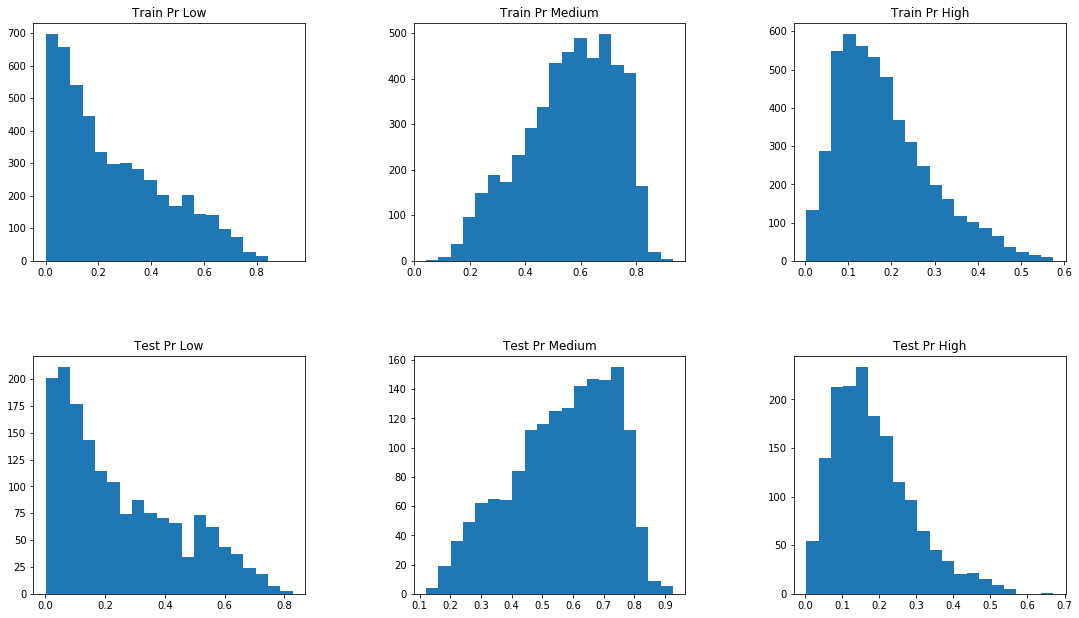

In [50]:
fig, axs = plt.subplots(2,3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].hist(lr_probs_l, bins=20)
axs[0, 0].set_title('Train Pr Low')

axs[0, 1].hist(lr_probs_m, bins=20)
axs[0, 1].set_title('Train Pr Medium')

axs[0, 2].hist(lr_probs_h, bins=20)
axs[0, 2].set_title('Train Pr High')

axs[1, 0].hist(lr_probs_test_l, bins=20)
axs[1, 0].set_title('Test Pr Low')

axs[1, 1].hist(lr_probs_test_m, bins=20)
axs[1, 1].set_title('Test Pr Medium')

axs[1, 2].hist(lr_probs_test_h, bins=20)
axs[1, 2].set_title('Test Pr High')


<a id="8" ><a/>

# 5. KNN for 3 Categories

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
classifier_knn3 = Pipeline([('classif3', KNeighborsClassifier())])


parameters_grid_knn3 =[{'classif3__n_neighbors':  list(range(1,15)),
                        'classif3__weights': ['distance','uniform'] ,
                        'classif3__algorithm' : ['ball_tree', 'brute','auto','kd_tree', 'brute'],
                        'classif3__leaf_size': [ 11,12,13],
                        'classif3__p': [1,2] }]

gs_knn3 = GridSearchCV(estimator=classifier_knn3, param_grid=parameters_grid_knn3, scoring='balanced_accuracy', cv=5, verbose=1, n_jobs=-1)

KNN_3_cat = Pipeline([('scl', StandardScaler()),('gs', gs_knn3)]) 

In [99]:
KNN_3_cat.fit(X_train,y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:  1.4min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score=nan,
                              estimator=Pipeline(memory=None,
                                                 steps=[('classif3',
                                                         KNeighborsClassifier(algorithm='auto',
                                                                              leaf_size=30,
                                                                              metric='minkowski',
                                                                              metric_params=None,
                                                                              n_jobs=None,
                                                                              n_neighbors=5,
                                                                              p=2,
                    

In [101]:
gs_knn3.best_params_
#With the values taken here, we find the best knn tuning parameters.

{'classif3__algorithm': 'ball_tree',
 'classif3__leaf_size': 11,
 'classif3__n_neighbors': 1,
 'classif3__p': 1,
 'classif3__weights': 'distance'}

In [102]:
KNN_model_3_cat=KNeighborsClassifier(n_neighbors=1,
                                 weights='distance',
                                 algorithm='ball_tree',
                                 leaf_size=11,
                                 p=1 )

In [103]:
KNN_model_3_cat.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=11, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='distance')

In [105]:
predicted_labels_knn3 = KNN_model_3_cat.predict(X_test)

In [107]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, predicted_labels_knn3.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.53      0.54      0.53       308
     class 2       0.86      0.86      0.86      1259
     class 3       0.21      0.21      0.21        58

    accuracy                           0.77      1625
   macro avg       0.53      0.53      0.53      1625
weighted avg       0.77      0.77      0.77      1625



In [109]:
roc_auc_knn_3_cat = roc_auc_score_multiclass(np.asarray(y_test), predicted_labels_knn3)

print(roc_auc_knn_3_cat)

{1: 0.7132922127227366, 2: 0.6912069167567286, 3: 0.5890896287657065}


<a id="9" ><a/>

# 6. Gradient Boosting Machines

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
y_pred_3cat_gb = gbm_model.predict(X_test)

In [114]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [115]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 62.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 68.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [116]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 500, 'subsample': 0.5}

In [25]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,  
                                      max_depth = 50, 
                                      n_estimators = 500, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [26]:
y_pred_3cat_gb = gbm_tuned.predict(X_test)

In [27]:
from sklearn.metrics import f1_score

In [28]:
print(f1_score(y_test, y_pred_3cat_gb.round(),average= 'weighted'))

0.827516032623189


In [29]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred_3cat_gb.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.74      0.54      0.62       308
     class 2       0.86      0.95      0.90      1259
     class 3       0.53      0.17      0.26        58

    accuracy                           0.84      1625
   macro avg       0.71      0.55      0.60      1625
weighted avg       0.83      0.84      0.83      1625



In [30]:
roc_auc_gbm_3_cat = roc_auc_score_multiclass(np.asarray(y_test), y_pred_3cat_gb)

print(roc_auc_gbm_3_cat)

{1: 0.5, 2: 0.5, 3: 0.5}


<a id="10" ><a/>

# 7. XGBoost for 3 Categories

In [31]:
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor

In [32]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [33]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [34]:
y_pred_xgb_3cat = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_xgb_3cat))

0.3650140043347091

## 7.1 Prediction

In [35]:
xgb_model

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [128]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [129]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 15.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estim...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid=

In [130]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 1000}

In [36]:
xgb_tuned_3_cat = XGBRegressor(colsample_bytree = 0.5,
                         learning_rate = 0.1, 
                         max_depth = 6 ,
                         n_estimators = 1000) 

xgb_tuned_3_cat = xgb_tuned_3_cat.fit(X_train,y_train)

In [41]:
y_pred_xgb_3_cat = xgb_tuned_3_cat.predict(X_test)


In [42]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred_xgb_3_cat.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.71      0.58      0.64       308
     class 2       0.87      0.94      0.90      1259
     class 3       0.61      0.19      0.29        58

    accuracy                           0.84      1625
   macro avg       0.73      0.57      0.61      1625
weighted avg       0.83      0.84      0.83      1625



In [43]:
roc_auc_xgb_3_cat = roc_auc_score_multiclass(np.asarray(y_test), y_pred_xgb_3_cat)

print(roc_auc_xgb_3_cat)

{1: 0.5, 2: 0.5, 3: 0.5}


<a id="11" ><a/>

# 8. Light GBM

In [136]:
# !pip install lightgbm
# conda install -c conda-forge lightgbm

In [46]:
from lightgbm import LGBMRegressor

## 8.1. Prediction

In [47]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [48]:
y_pred = lgbm_model.predict(X_test, num_iteration = lgbm_model.best_iteration_)
np.sqrt(mean_squared_error(y_test, y_pred))

0.36292378834764244

## 8.2 Model Tuning

In [49]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [142]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [143]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 1121 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 1567 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 2225 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3521 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4290 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 5141 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 6072 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 7085 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 8178 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 9353 tasks      |

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 

In [144]:
lgbm_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 1000}

In [50]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 1000,
                          colsample_bytree = 1)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [51]:
y_pred_LB_3cat = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_LB_3cat))

0.35567336514350767

In [147]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred_LB_3cat.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.71      0.57      0.63       308
     class 2       0.87      0.93      0.90      1259
     class 3       0.39      0.16      0.22        58

    accuracy                           0.84      1625
   macro avg       0.66      0.55      0.58      1625
weighted avg       0.82      0.84      0.82      1625



In [54]:
roc_auc_lgb_3_cat = roc_auc_score_multiclass(np.asarray(y_test), y_pred_LB_3cat)

print(roc_auc_lgb_3_cat)


{1: 0.5, 2: 0.5, 3: 0.5}


<a id="12" ><a/>

# 9. CatBoost

In [148]:
# !pip install catboost

In [149]:
from catboost import CatBoostRegressor

In [150]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.051738
0:	learn: 0.4555405	total: 66.4ms	remaining: 1m 6s
1:	learn: 0.4513585	total: 69.1ms	remaining: 34.5s
2:	learn: 0.4478781	total: 71.7ms	remaining: 23.8s
3:	learn: 0.4445636	total: 74.2ms	remaining: 18.5s
4:	learn: 0.4411634	total: 77.3ms	remaining: 15.4s
5:	learn: 0.4382115	total: 79.6ms	remaining: 13.2s
6:	learn: 0.4356260	total: 81.8ms	remaining: 11.6s
7:	learn: 0.4327079	total: 84.1ms	remaining: 10.4s
8:	learn: 0.4298643	total: 86.5ms	remaining: 9.52s
9:	learn: 0.4274306	total: 88.8ms	remaining: 8.79s
10:	learn: 0.4252545	total: 91.8ms	remaining: 8.25s
11:	learn: 0.4232404	total: 94ms	remaining: 7.74s
12:	learn: 0.4211672	total: 96.5ms	remaining: 7.33s
13:	learn: 0.4192677	total: 98.9ms	remaining: 6.96s
14:	learn: 0.4174352	total: 101ms	remaining: 6.65s
15:	learn: 0.4157440	total: 104ms	remaining: 6.37s
16:	learn: 0.4141334	total: 106ms	remaining: 6.13s
17:	learn: 0.4127031	total: 108ms	remaining: 5.91s
18:	learn: 0.4110455	total: 111ms	remaining: 5.71s

## 9.1 Prediction

In [151]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.361129413101436

## 9.2 Model Tuning

In [152]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [153]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [154]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 31.1min finished


0:	learn: 0.4551335	total: 8.41ms	remaining: 16.8s
1:	learn: 0.4511705	total: 13.5ms	remaining: 13.5s
2:	learn: 0.4465815	total: 18.6ms	remaining: 12.4s
3:	learn: 0.4435069	total: 20.7ms	remaining: 10.3s
4:	learn: 0.4396394	total: 26.4ms	remaining: 10.5s
5:	learn: 0.4364379	total: 33.6ms	remaining: 11.2s
6:	learn: 0.4330528	total: 40.4ms	remaining: 11.5s
7:	learn: 0.4300713	total: 45.6ms	remaining: 11.4s
8:	learn: 0.4273813	total: 50.8ms	remaining: 11.2s
9:	learn: 0.4246745	total: 55.9ms	remaining: 11.1s
10:	learn: 0.4220794	total: 76.5ms	remaining: 13.8s
11:	learn: 0.4194491	total: 81.9ms	remaining: 13.6s
12:	learn: 0.4170485	total: 87.5ms	remaining: 13.4s
13:	learn: 0.4148792	total: 92.6ms	remaining: 13.1s
14:	learn: 0.4125917	total: 98ms	remaining: 13s
15:	learn: 0.4104444	total: 105ms	remaining: 13.1s
16:	learn: 0.4084626	total: 112ms	remaining: 13.1s
17:	learn: 0.4066502	total: 118ms	remaining: 12.9s
18:	learn: 0.4048585	total: 124ms	remaining: 12.9s
19:	learn: 0.4032354	total: 12

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020DC9665708>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [155]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 2000, 'learning_rate': 0.05}

In [156]:
catb_tuned = CatBoostRegressor(iterations = 2000, 
                               learning_rate = 0.05, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 0.4551335	total: 9.81ms	remaining: 19.6s
1:	learn: 0.4511705	total: 14.6ms	remaining: 14.6s
2:	learn: 0.4465815	total: 19.6ms	remaining: 13.1s
3:	learn: 0.4435069	total: 21.7ms	remaining: 10.8s
4:	learn: 0.4396394	total: 26.5ms	remaining: 10.6s
5:	learn: 0.4364379	total: 31.2ms	remaining: 10.4s
6:	learn: 0.4330528	total: 36.3ms	remaining: 10.3s
7:	learn: 0.4300713	total: 41ms	remaining: 10.2s
8:	learn: 0.4273813	total: 45.8ms	remaining: 10.1s
9:	learn: 0.4246745	total: 50.6ms	remaining: 10.1s
10:	learn: 0.4220794	total: 55.8ms	remaining: 10.1s
11:	learn: 0.4194491	total: 60.4ms	remaining: 10s
12:	learn: 0.4170485	total: 65.4ms	remaining: 9.99s
13:	learn: 0.4148792	total: 73.1ms	remaining: 10.4s
14:	learn: 0.4125917	total: 78.9ms	remaining: 10.4s
15:	learn: 0.4104444	total: 84.1ms	remaining: 10.4s
16:	learn: 0.4084626	total: 89.8ms	remaining: 10.5s
17:	learn: 0.4066502	total: 94.7ms	remaining: 10.4s
18:	learn: 0.4048585	total: 101ms	remaining: 10.6s
19:	learn: 0.4032354	total:

In [157]:
y_pred_cb_3cat = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_cb_3cat))

0.3411913795715213

In [158]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, y_pred_cb_3cat.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.77      0.59      0.67       308
     class 2       0.87      0.95      0.91      1259
     class 3       0.58      0.19      0.29        58

    accuracy                           0.86      1625
   macro avg       0.74      0.58      0.62      1625
weighted avg       0.84      0.86      0.84      1625



<a id="13" ><a/>

# Quality Inspection Based On 2 Categories

### The target value "quality" is considered with 2 labels: 
1) Low
2)High 

-  From the original data set was dropped the Unnamed: 0 col since it was useless (containing a index)
-  The categorical predictor "color" (red/ white) was encoded as 0,1 (red=1 and white =0).
-  The target value "quality" was labeled as "Low" if the wine has a score qaulity 0-5 (included) and 
   as "high" overwise. The The labels "high" and "low" were encoded as a binary 0,1 (hight=1 and low=0).
The data frame obtained was shaffuled randomly and splitted in a Train set (75% of all observations) and Test set 
(25% of all observation).

In [66]:
df_2_cat= data.copy()


df_2_cat['quality_label'] = df_2_cat.quality.apply(lambda q: 'low' if q <= 5 else 'high')
df_2_cat['quality_class'] = df_2_cat.quality_label.apply(lambda q: 1 if q == 'high' else 0)
77df_2_cat['val_col'] = df_2_cat.type.apply(lambda q: 1 if q=='red' else 2)
df_2_cat.shape

(6497, 17)

In [68]:
df_2_cat.drop('Unnamed: 0',axis=1,inplace=True)
df_2_cat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label,quality_class,val_col
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,high,1,2
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,high,1,2
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,high,1,2
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,high,1,2
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low,0,2


In [69]:
df_2_cat = df_2_cat.sample(frac=1, random_state=42).reset_index(drop=True)
df_2_cat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label,quality_class,val_col
0,6.0,0.200,0.32,3.0,0.031,26.0,118.0,0.99134,3.38,0.68,11.2,7,white,high,1,2
1,9.2,0.430,0.49,2.4,0.086,23.0,116.0,0.99760,3.23,0.64,9.5,5,red,low,0,1
2,6.3,0.270,0.18,7.7,0.048,45.0,186.0,0.99620,3.23,0.47,9.0,5,white,low,0,2
3,8.6,0.485,0.29,4.1,0.026,19.0,101.0,0.99180,3.01,0.38,12.4,5,white,low,0,2
4,7.7,0.270,0.34,1.8,0.028,26.0,168.0,0.99110,2.99,0.48,12.1,7,white,high,1,2


In [70]:
df_2_cat = df_2_cat.drop([ "quality_label","quality", "type"], axis = 1)
y_2_cat = df_2_cat['quality_class']
X_2_cat = df_2_cat.drop(['quality_class'], axis = 1)
X_train_2cat, X_test_2cat, y_train_2cat, y_test_2cat = train_test_split(X_2_cat, y_2_cat, test_size=0.25, random_state=42)
# we now use X_train_2cat to not confuse with X_train used in the case of 3 categories for the target variable

<a id="14" ><a/>

# 1. Trees for 2 Categories

In [54]:

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import f1_score
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics

In [55]:
cl_tree2 = Pipeline([('cl2', DecisionTreeClassifier(random_state=42))])  

# list of  parameters  to tune
criterion2 = ['gini', 'entropy']
splitter2= ['best','random']
max_depth2 = list(range(1,20))
min_samples_leaf2 = [0.5,1,2,3]
class_weight2 = ['balanced', None] 
max_features2=[12,11,10,9]

parameters_grid_tree2 =[{ 'cl2__class_weight': class_weight2
      ,'cl2__criterion': criterion2
      ,'cl2__splitter': splitter2
      ,'cl2__max_depth': max_depth2
      ,'cl2__min_samples_leaf': min_samples_leaf2
      ,'cl2__max_features':max_features2}]

gs_tree2 = GridSearchCV(estimator=cl_tree2, param_grid=parameters_grid_tree2, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

Dec_trees2 = Pipeline([('scl', StandardScaler()),('gs', gs_tree2)]) 

In [71]:
Dec_trees2.fit(X_train_2cat,y_train_2cat)

Fitting 5 folds for each of 2432 candidates, totalling 12160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1894 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 4894 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 9094 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 12160 out of 12160 | elapsed:  1.2min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('cl2',
                                                         DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                            

In [72]:
best_param_tree2=gs_tree2.best_params_ 
best_param_tree2

{'cl2__class_weight': 'balanced',
 'cl2__criterion': 'entropy',
 'cl2__max_depth': 19,
 'cl2__max_features': 9,
 'cl2__min_samples_leaf': 1,
 'cl2__splitter': 'best'}

In [73]:
Tree2=DecisionTreeClassifier(class_weight= 'balanced',
 criterion= 'entropy',
 max_depth=19, 
 max_features=9,                          
 min_samples_leaf= 1, 
 splitter='best')

In [74]:
Tree2.fit(X_train_2cat,y_train_2cat)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=19, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
predicted_labels_tree2 = Tree2.predict(X_test_2cat).ravel()

In [76]:
true_labels_tree2=np.asarray(y_test_2cat)

In [77]:
target_names = ['class 1', 'class 0']
print(classification_report(y_test_2cat, Tree2.predict(X_test_2cat).round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.68      0.69      0.68       586
     class 0       0.82      0.81      0.82      1039

    accuracy                           0.77      1625
   macro avg       0.75      0.75      0.75      1625
weighted avg       0.77      0.77      0.77      1625



In [78]:
cm_tree2 = metrics.confusion_matrix(y_true=true_labels_tree2, y_pred=predicted_labels_tree2)
cm_frame_tree2 = pd.DataFrame(data=cm_tree2, columns=target_names,index=target_names)

In [79]:
cm_frame_tree2

,class 1,class 0
class 1,404,182
class 0,194,845


In [80]:
lr_roc_auc_multiclass_tree2 = roc_auc_score_multiclass(true_labels_tree2, predicted_labels_tree2)

print(lr_roc_auc_multiclass_tree2)

{0: 0.7513508985733854, 1: 0.7513508985733854}


<a id="15" ><a/>

# 2. Random Forest for 2 Categories

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
cl_RF_2 = Pipeline([('cl_rf2', RandomForestClassifier(random_state=42))])  

# list of  parameters  to tune

criterion_rf2 = ['gini', 'entropy'] 

class_weight_rf2 = ['balanced', None] 

n_estimators_rf2 = list(range(150,200, 10))  #by 10

max_depth_rf2  = [16,20,24,28, None] 

min_samples_split_rf2 = [2, 3, 4] 

min_samples_leaf_rf2 = [1,2]

param_grid_rf2 =[{ 'cl_rf2__class_weight': class_weight_rf2
      ,'cl_rf2__criterion': criterion_rf2
    
      ,'cl_rf2__n_estimators': n_estimators_rf2 
    
      ,'cl_rf2__min_samples_split': min_samples_split_rf2
    
      ,'cl_rf2__max_depth': max_depth_rf2
      ,'cl_rf2__min_samples_leaf': min_samples_leaf_rf2
}]

gs_rf2 = GridSearchCV(estimator=cl_RF_2, param_grid=param_grid_rf2, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)
RF2 = Pipeline([('scl', StandardScaler()),
        ('gs', gs_rf2)
 ]) 

In [83]:
RF2.fit(X_train_2cat,y_train_2cat)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 26.9min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('cl_rf2',
                                                         RandomForestClassifier(bootstrap=True,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                  

In [85]:
best_param_rf2=gs_rf2.best_params_ 

In [86]:
best_param_rf2

{'cl_rf2__class_weight': None,
 'cl_rf2__criterion': 'gini',
 'cl_rf2__max_depth': 28,
 'cl_rf2__min_samples_leaf': 1,
 'cl_rf2__min_samples_split': 2,
 'cl_rf2__n_estimators': 170}

In [87]:
R_forest2=RandomForestClassifier(class_weight=None,
 criterion='gini',
 max_depth=28,
 min_samples_split=2,                          
 n_estimators=170,
 min_samples_leaf=1
)

In [88]:
R_forest2.fit(X_train_2cat,y_train_2cat)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=28, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=170,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
predicted_labels_rf2 = R_forest2.predict(X_test_2cat).ravel()
true_labels_rf2=np.asarray(y_test_2cat)
target_names = ['class 0', 'class 1']
print(classification_report(y_test_2cat, R_forest2.predict(X_test_2cat).round(), target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.73      0.75       586
     class 1       0.85      0.87      0.86      1039

    accuracy                           0.82      1625
   macro avg       0.81      0.80      0.80      1625
weighted avg       0.82      0.82      0.82      1625



In [90]:
cm_rf2 = metrics.confusion_matrix(y_true=true_labels_rf2, y_pred=predicted_labels_rf2)
cm_frame_rf2 = pd.DataFrame(data=cm_rf2, columns=target_names,index=target_names)
cm_frame_rf2

,class 0,class 1
class 0,427,159
class 1,132,907


In [91]:
lr_roc_auc_multiclass_rf2 = roc_auc_score_multiclass(true_labels_rf2, predicted_labels_rf2)

print(lr_roc_auc_multiclass_rf2)

{0: 0.8008118530879325, 1: 0.8008118530879326}


<a id="16" ><a/>

# 3. NN for 2 Categories

In [92]:
# Define the scaler
scaler_NN2 = StandardScaler().fit(X_train_2cat)
# Scale the train set
X_train_scaled_NN2 = scaler.transform(X_train_2cat)
# Scale the test set
X_test_scaled_NN2 = scaler.transform(X_test_2cat)

import numpy as np
X_train1_NN2=np.asarray(X_train_scaled_NN2)
y_train1_NN2=np.asarray(y_train_2cat)

X_test1_NN2=np.asarray(X_test_scaled_NN2)
y_test1_NN2=np.asarray(y_test_2cat)

In [101]:
y_train1_NN2

array([0, 0, 1, ..., 0, 1, 1])

In [106]:
model_NN2 = Sequential()
model_NN2.add(Dense(300, input_shape=(12,), activation='tanh'))
model_NN2.add(Dense(200, activation='tanh'))
model_NN2.add(Dense(100, activation='tanh'))

* we started to try a model with only one Dense hidden layer equal to 4000 than to 5000 and to get a good
* performance in termns of loss, accuracy and F1 scores we needed to run a lot epochs so it required some time.
* than trying a neural network with 3 dense hidded layers it required to run less epochs 
* and get about some more performance.
* tanh performed a bit better than relu


In [ ]:
model_NN2.add(Dense(1, activation='sigmoid')) #Dense=1 and sigmoid because of binary target classification
model_NN2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],random_state=42)


* optimizer_sgd=tf.keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
* it was tried but did not show a better performance with respect to adam optimizer but it was much slower

In [107]:
History_adam_NN2=model_NN2.fit(X_train1_NN2, y_train1_NN2,
          batch_size=50,
          epochs=1200)
    #acctualy already with half of this epoch nr we have a very low loss and high accuracy on the train set      

Train on 4872 samples
Epoch 1/1200
4872/4872 [==============================] - 1s 169us/sample - loss: 0.5310 - accuracy: 0.7323
Epoch 2/1200
4872/4872 [==============================] - 0s 62us/sample - loss: 0.5062 - accuracy: 0.7500
Epoch 3/1200
4872/4872 [==============================] - 0s 60us/sample - loss: 0.4954 - accuracy: 0.7607
Epoch 4/1200
4872/4872 [==============================] - 0s 60us/sample - loss: 0.4932 - accuracy: 0.7586
Epoch 5/1200
4872/4872 [==============================] - 0s 61us/sample - loss: 0.4860 - accuracy: 0.7654
Epoch 6/1200
4872/4872 [==============================] - 0s 60us/sample - loss: 0.4787 - accuracy: 0.7689
Epoch 7/1200
4872/4872 [==============================] - 0s 59us/sample - loss: 0.4721 - accuracy: 0.7720
Epoch 8/1200
4872/4872 [==============================] - 0s 59us/sample - loss: 0.4688 - accuracy: 0.7796
Epoch 9/1200
4872/4872 [==============================] - 0s 60us/sample - loss: 0.4580 - accuracy: 0.7785
Epoch 10/1200


In [108]:
predicted_nn2 = model_NN2.predict(X_test1_NN2)

labels_nn2  = (predicted_nn2 > 0.5).astype(np.int)

In [109]:
sk_report_nn2 = classification_report(
    digits=3,
    y_true=y_test1_NN2, 
    y_pred=labels_nn2)
print(sk_report_nn2)

              precision    recall  f1-score   support

           0      0.731     0.710     0.720       586
           1      0.839     0.853     0.846      1039

    accuracy                          0.801      1625
   macro avg      0.785     0.781     0.783      1625
weighted avg      0.800     0.801     0.801      1625



In [110]:
cm_nn2= metrics.confusion_matrix(y_test_2cat, labels_nn2)
conf_matrix_nn2=pd.DataFrame(cm_nn2,columns=['0','1'],index=['0','1'])


conf_matrix_nn2

,0,1
0,416,170
1,153,886


In [111]:
lr_roc_auc_multiclass_nn2 = roc_auc_score_multiclass(y_test1_NN2, labels_nn2 )

print(lr_roc_auc_multiclass_nn2)

{0: 0.7813203165290857, 1: 0.7813203165290857}


Text(0, 0.5, 'Loss')

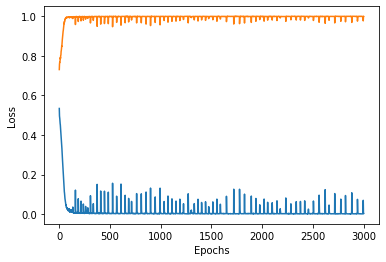

In [105]:
from matplotlib import pyplot as plt

history_dict=History_adam_NN2.history

loss_values = history_dict['loss']

acc_values = history_dict['accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values)
plt.plot(epochs, acc_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

<a id="17" ><a/>

# 4. Logistic Regression for 2 Categories

In [113]:
clf_lg2 = Pipeline([('clf_lg2', LogisticRegression(random_state=42))])  

# a list of dictionaries to specify the parameters that we'd want to tune

tol_lg2 = [1e-07,1e-06, 1e-05, 1e-04]

param_grid_lg2 =[{
     'clf_lg2__solver': ['liblinear', 'saga'] 
     ,'clf_lg2__penalty': ['l1', 'l2']
     ,'clf_lg2__tol' : tol_lg2 
     ,'clf_lg2__class_weight': ['balanced']}]
gs_lg2 = GridSearchCV(estimator=clf_lg2, param_grid=param_grid_lg2, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

Log_2 = Pipeline([('scl', StandardScaler()),
        ('gs', gs_lg2)])  

In [114]:
Log_2.fit(X_train_2cat,y_train_2cat)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.5s finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('clf_lg2',
                                                         LogisticRegression(C=1.0,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                

In [115]:
best_param_lg2=gs_lg2.best_params_
best_param_lg2

{'clf_lg2__class_weight': 'balanced',
 'clf_lg2__penalty': 'l2',
 'clf_lg2__solver': 'liblinear',
 'clf_lg2__tol': 1e-07}

In [116]:
Log_model2=LogisticRegression(class_weight='balanced',
 penalty='l2',
 solver= 'liblinear',
 tol= 1e-07)

In [117]:
Log_model2.fit(X_train_2cat,y_train_2cat)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=1e-07, verbose=0,
                   warm_start=False)

In [128]:
predicted_labels_lg2 = Log_model2.predict(X_test_2cat).ravel()

true_labels_lg2=np.asarray(y_test_2cat)

target_names = ['class 1', 'class 0']
print(classification_report(y_test_2cat, Log_model2.predict(X_test_2cat).round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.59      0.74      0.66       586
     class 0       0.83      0.71      0.77      1039

    accuracy                           0.72      1625
   macro avg       0.71      0.73      0.71      1625
weighted avg       0.74      0.72      0.73      1625



In [129]:
cm_lg2= metrics.confusion_matrix(y_true=true_labels_lg2, y_pred=predicted_labels_lg2)

In [134]:
cm_frame_lg2 = pd.DataFrame(data=cm_lg2, index= target_names, columns=target_names) 

In [135]:
cm_frame_lg2

,class 1,class 0
class 1,435,151
class 0,299,740


In [136]:
lr_roc_auc_multiclass_lg2 = roc_auc_score_multiclass(true_labels_lg2, predicted_labels_lg2)

print(lr_roc_auc_multiclass_lg2)

{0: 0.7272720553695962, 1: 0.7272720553695962}


In [137]:
lr_probs_l = [x for (x,y) in Log_model2.predict_proba(X_train_2cat)] 
lr_probs_h = [y for (x,y) in Log_model2.predict_proba(X_train_2cat)] 
 
lr_probs_test_l = [x for (x,y) in Log_model2.predict_proba(X_test_2cat)]
lr_probs_test_h= [y for (x,y) in Log_model2.predict_proba(X_test_2cat)]

* list of prob to belong to low, and high quality on test set

Text(0.5, 1.0, 'Test Pr High')

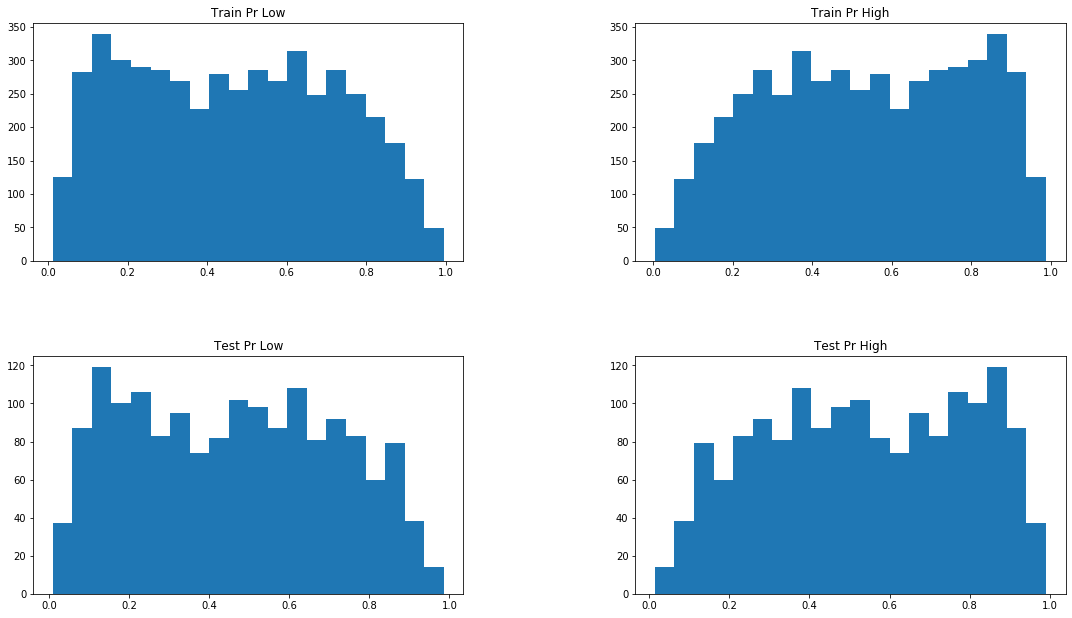

In [138]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_size_inches(18.5, 10.5)

axs[0, 0].hist(lr_probs_l, bins=20)
axs[0, 0].set_title('Train Pr Low')

axs[0, 1].hist(lr_probs_h, bins=20)
axs[0, 1].set_title('Train Pr High')



axs[1, 0].hist(lr_probs_test_l, bins=20)
axs[1, 0].set_title('Test Pr Low')

axs[1, 1].hist(lr_probs_test_h, bins=20)
axs[1, 1].set_title('Test Pr High')




<a id="18" ><a/>

# 5. KNN for 2 Categories

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
classifier_knn2 = Pipeline([('classif2', KNeighborsClassifier())])


In [140]:
parameters_grid_knn2 =[{'classif2__n_neighbors':  list(range(1,15))
     ,'classif2__weights': ['distance','uniform'] 
     ,'classif2__algorithm' : ['ball_tree', 'brute', 'auto',  'kd_tree', 'brute']
     ,'classif2__leaf_size': [11,12, 13]
     ,'classif2__p': [1,2] }]

gs_knn2 = GridSearchCV(estimator=classifier_knn2, param_grid=parameters_grid_knn2, scoring='balanced_accuracy', cv=5, verbose=1, n_jobs=-1)

KNN2 = Pipeline([('scl', StandardScaler()),('gs', gs_knn2)]) 

In [141]:
KNN2.fit(X_train_2cat,y_train_2cat)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:  3.2min finished


Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gs',
                 GridSearchCV(cv=5, error_score='raise-deprecating',
                              estimator=Pipeline(memory=None,
                                                 steps=[('classif2',
                                                         KNeighborsClassifier(algorithm='auto',
                                                                              leaf_size=30,
                                                                              metric='minkowski',
                                                                              metric_params=None,
                                                                              n_jobs=None,
                                                                              n_neighbors=5,
                                                                              p=2,
    

In [142]:
gs_knn2.best_params_

{'classif2__algorithm': 'ball_tree',
 'classif2__leaf_size': 11,
 'classif2__n_neighbors': 12,
 'classif2__p': 1,
 'classif2__weights': 'distance'}

In [143]:
KNN_model2=KNeighborsClassifier(n_neighbors=12,
                                weights='distance',
                                algorithm='ball_tree',
                                leaf_size= 11,
                                p= 1 )

In [144]:
KNN_model2.fit(X_train_2cat,y_train_2cat)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=11, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=1,
                     weights='distance')

In [145]:
best_knn2 = gs_knn2.best_score_
predicted_labels_knn2 = KNN_model2.predict(X_test_2cat).ravel()

In [146]:
from sklearn.metrics import classification_report
true_labels_knn2=np.asarray(y_test_2cat)
target_names = ['class 1', 'class 2']
print(classification_report(y_test_2cat, KNN_model2.predict(X_test_2cat).round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.71      0.60      0.65       586
     class 2       0.79      0.87      0.83      1039

    accuracy                           0.77      1625
   macro avg       0.75      0.73      0.74      1625
weighted avg       0.76      0.77      0.76      1625



In [147]:
cm_knn2= metrics.confusion_matrix(y_true=true_labels_knn2, y_pred=predicted_labels_knn2)
cm_frame_knn2 = pd.DataFrame(data=cm_knn2, columns=target_names,index=target_names) 
cm_frame_knn2

,class 1,class 2
class 1,350,236
class 2,140,899


In [148]:
roc_auc_multiclass_knn2 = roc_auc_score_multiclass(true_labels_knn2, predicted_labels_knn2)

print(roc_auc_multiclass_knn2)

{0: 0.7312623387544469, 1: 0.7312623387544469}


<a id="19" ><a/>

# 6. Gradient Boosting Machines for 2 Categories

In [216]:
df_2= data.copy()

df_2['quality_label'] = df_2.quality.apply(lambda q: 'low' if q <= 5 else 'high')
df_2['quality_class'] = df_2.quality_label.apply(lambda q: 1 if q == 'high' else 0)
df_2['val_col'] = df_2.type.apply(lambda q: 1 if q == 'red' else 2)
df_2.shape

(6497, 17)

In [217]:
df_2 = df_2.drop([ "quality_label","quality", "Unnamed: 0", "type"], axis = 1)
y = df_2['quality_class']
X = df_2.drop(['quality_class'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [218]:
from sklearn.ensemble import GradientBoostingRegressor

In [219]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## 6.1 Prediction

In [220]:
y_pred_GB_2 = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.3664102323522476

In [222]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred_GB_2.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.70      0.65      0.67       583
     class 2       0.81      0.84      0.83      1042

    accuracy                           0.77      1625
   macro avg       0.76      0.75      0.75      1625
weighted avg       0.77      0.77      0.77      1625



## 6.2 Modeli Tuning

In [223]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [224]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 63.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [230]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 100,
 'n_estimators': 500,
 'subsample': 0.5}

In [231]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,  
                                      max_depth = 100, 
                                      n_estimators = 500, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [232]:
y_pred_GB_2 = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_GB_2))

0.3405693774374049

In [233]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred_GB_2.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.78      0.76      0.77       583
     class 2       0.87      0.88      0.87      1042

    accuracy                           0.84      1625
   macro avg       0.82      0.82      0.82      1625
weighted avg       0.84      0.84      0.84      1625



<a id="20" ><a/>

# 7. XGBoost

In [234]:
import xgboost as xgb

In [235]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [236]:
from xgboost import XGBRegressor

In [237]:
xgb_model = XGBRegressor().fit(X_train, y_train)

# 7.1 Tuning

In [238]:
xgb_model

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [239]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [240]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 15.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estim...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid=

In [241]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 500}

In [242]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [243]:
y_pred_XGB_2 = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_XGB_2))

0.3517310288488201

In [244]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred_XGB_2.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.76      0.73      0.74       583
     class 2       0.85      0.87      0.86      1042

    accuracy                           0.82      1625
   macro avg       0.80      0.80      0.80      1625
weighted avg       0.82      0.82      0.82      1625



<a id="21" ><a/>

# 8. Light GBM

In [245]:
from lightgbm import LGBMRegressor

In [246]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## 8.1 Prediction

In [247]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [248]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.3667929541027689

In [249]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.73      0.70      0.72       583
     class 2       0.84      0.86      0.85      1042

    accuracy                           0.80      1625
   macro avg       0.78      0.78      0.78      1625
weighted avg       0.80      0.80      0.80      1625



## 8.2 Model Tuning

In [250]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [251]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 1162 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 1698 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 2225 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3629 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4398 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6288 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7301 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 8394 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 9569 tasks      |

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 

In [252]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 500}

In [253]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 500,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [254]:
y_pred_LB_2 = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_LB_2))

0.35963963520597

In [255]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.73      0.70      0.72       583
     class 2       0.84      0.86      0.85      1042

    accuracy                           0.80      1625
   macro avg       0.78      0.78      0.78      1625
weighted avg       0.80      0.80      0.80      1625



<a id="22" ><a/>

# 9. CatBoost for 2 Categories

In [256]:
from catboost import CatBoostRegressor

In [257]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.051738
0:	learn: 0.4775415	total: 71ms	remaining: 1m 10s
1:	learn: 0.4721648	total: 73.6ms	remaining: 36.7s
2:	learn: 0.4674146	total: 76.5ms	remaining: 25.4s
3:	learn: 0.4632894	total: 79.3ms	remaining: 19.7s
4:	learn: 0.4591545	total: 81.7ms	remaining: 16.3s
5:	learn: 0.4549856	total: 84.2ms	remaining: 13.9s
6:	learn: 0.4512318	total: 86.6ms	remaining: 12.3s
7:	learn: 0.4480386	total: 88.9ms	remaining: 11s
8:	learn: 0.4448641	total: 91.4ms	remaining: 10.1s
9:	learn: 0.4419794	total: 93.8ms	remaining: 9.29s
10:	learn: 0.4392584	total: 96.4ms	remaining: 8.66s
11:	learn: 0.4367977	total: 98.6ms	remaining: 8.12s
12:	learn: 0.4345892	total: 101ms	remaining: 7.68s
13:	learn: 0.4324905	total: 104ms	remaining: 7.29s
14:	learn: 0.4302961	total: 106ms	remaining: 6.96s
15:	learn: 0.4281659	total: 108ms	remaining: 6.67s
16:	learn: 0.4267479	total: 111ms	remaining: 6.41s
17:	learn: 0.4252309	total: 113ms	remaining: 6.17s
18:	learn: 0.4233390	total: 116ms	remaining: 5.98s
19

## 9.1 Prediction

In [258]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.3623124661243852

In [259]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.76      0.72      0.74       583
     class 2       0.85      0.87      0.86      1042

    accuracy                           0.82      1625
   macro avg       0.80      0.79      0.80      1625
weighted avg       0.81      0.82      0.81      1625



## 9.2 Model Tuning

In [260]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [261]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [262]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 26.6min finished


0:	learn: 0.4770973	total: 18.1ms	remaining: 36.1s
1:	learn: 0.4724406	total: 22.4ms	remaining: 22.3s
2:	learn: 0.4676403	total: 26.7ms	remaining: 17.8s
3:	learn: 0.4636023	total: 28.3ms	remaining: 14.1s
4:	learn: 0.4592002	total: 32.2ms	remaining: 12.8s
5:	learn: 0.4548730	total: 36.6ms	remaining: 12.2s
6:	learn: 0.4508499	total: 40.9ms	remaining: 11.7s
7:	learn: 0.4477620	total: 45.5ms	remaining: 11.3s
8:	learn: 0.4446490	total: 49.4ms	remaining: 10.9s
9:	learn: 0.4415349	total: 53.2ms	remaining: 10.6s
10:	learn: 0.4385020	total: 57ms	remaining: 10.3s
11:	learn: 0.4357518	total: 61.6ms	remaining: 10.2s
12:	learn: 0.4333792	total: 65.6ms	remaining: 10s
13:	learn: 0.4311889	total: 69.4ms	remaining: 9.84s
14:	learn: 0.4285195	total: 75.8ms	remaining: 10s
15:	learn: 0.4259213	total: 79.6ms	remaining: 9.88s
16:	learn: 0.4236314	total: 83.6ms	remaining: 9.75s
17:	learn: 0.4215506	total: 87.4ms	remaining: 9.63s
18:	learn: 0.4196424	total: 91.4ms	remaining: 9.53s
19:	learn: 0.4180143	total: 

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000159AC425488>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [263]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 2000, 'learning_rate': 0.05}

In [264]:
catb_tuned = CatBoostRegressor(iterations = 2000, 
                               learning_rate = 0.05, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 0.4770973	total: 8.91ms	remaining: 17.8s
1:	learn: 0.4724406	total: 12.9ms	remaining: 12.9s
2:	learn: 0.4676403	total: 16.8ms	remaining: 11.2s
3:	learn: 0.4636023	total: 18.5ms	remaining: 9.21s
4:	learn: 0.4592002	total: 22.1ms	remaining: 8.82s
5:	learn: 0.4548730	total: 25.9ms	remaining: 8.61s
6:	learn: 0.4508499	total: 29.6ms	remaining: 8.42s
7:	learn: 0.4477620	total: 33.4ms	remaining: 8.31s
8:	learn: 0.4446490	total: 37.2ms	remaining: 8.23s
9:	learn: 0.4415349	total: 40.8ms	remaining: 8.12s
10:	learn: 0.4385020	total: 44.5ms	remaining: 8.04s
11:	learn: 0.4357518	total: 48.3ms	remaining: 8s
12:	learn: 0.4333792	total: 52.3ms	remaining: 7.99s
13:	learn: 0.4311889	total: 55.9ms	remaining: 7.93s
14:	learn: 0.4285195	total: 59.9ms	remaining: 7.93s
15:	learn: 0.4259213	total: 64.8ms	remaining: 8.03s
16:	learn: 0.4236314	total: 69.4ms	remaining: 8.1s
17:	learn: 0.4215506	total: 74.7ms	remaining: 8.22s
18:	learn: 0.4196424	total: 80.6ms	remaining: 8.4s
19:	learn: 0.4180143	total:

In [265]:
y_pred_CB_2 = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_CB_2))

0.3463405637738631

In [266]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred_CB_2.round(), target_names = target_names))

              precision    recall  f1-score   support

     class 1       0.76      0.75      0.75       583
     class 2       0.86      0.87      0.86      1042

    accuracy                           0.83      1625
   macro avg       0.81      0.81      0.81      1625
weighted avg       0.82      0.83      0.82      1625

